## Dataset

O primeiro passo é preparar o conjunto de dados para que possamos treinar e testar o nosso modelo.

Os nossos dados devem ser organizados da seguinte maneira:
```
└── example
    ├── images
    │   ├── img_01.png
    │   └── img_02.png
    └── labelTxt
        ├── img_01.txt
        └── img_02.txt
```
obs: Na pasta `datasets/DOTA_devkit` você encontrará um exemplo.

Em seguida devemos fazer o split das nossas imagens:

In [1]:
import os
from bbavectors import ROOT
from DOTA_devkit.ImgSplit import splitbase

split = splitbase(
    os.path.join(ROOT, 'datasets/example'),
    os.path.join(ROOT, 'datasets/examplesplit'),
    subsize=1024, gap=128, ext='.jpg'
)

# rate: resize image before cut
split.splitdata(rate=1.0)

## Treinando um modelo

In [2]:
# Outros parâmetros podem ser consultados no arquivo main.py
!python bbavectors/main.py \
    --data_dir examplesplit \
    --num_epoch 5 \
    --batch_size 2 \
    --dataset dota \
    --phase train

Setting up data...
Starting training...
----------
Epoch: 1/5 
train loss: 23.47359427090349
/home/guilherme/.virtualenvs/bbaenv/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
----------
Epoch: 2/5 
train loss: 8.370286448248502
----------
Epoch: 3/5 
train loss: 8.98488867693934
----------
Epoch: 4/5 
train loss: 7.389384368370319
----------
Epoch: 5/5 
train loss: 7.809287038342706


## Testando o modelo

Para testar o modelo podemos usar a flag --phase test ou --phase eval. A diferença é que o teste plota os resultados na tela e o eval salva os resultados em um arquivo.

### Resultados

Após rodar o modelo com `--phase eval` os resultados serão salvos em duas pastas:
 - results: nessa pasta são salvos os resultados obtidos em cada imagem individualmente.
 - merge: nessa pasta os resultados salvos já foram mergeados e portanto estão na resolução da imagem original.

In [7]:
# Outros parâmetros podem ser consultados no arquivo main.py
!python bbavectors/main.py \
    --data_dir examplesplit \
    --batch_size 1 \
    --dataset dota \
    --resume model_last.pth \
    --phase eval

loaded weights from /home/guilherme/Documents/Code/Nuveo/BBAVectors-Oriented-Object-Detection/bbavectors/work_dir/weights/model_last.pth, epoch 5
[1/59] testing data: P2598__1.0__1332___0 - Time elapsed: 0.1337
[2/59] testing data: P2598__1.0__0___0 - Time elapsed: 0.1031
[3/59] testing data: P0770__1.0__0___0 - Time elapsed: 0.1044
[4/59] testing data: P1234__1.0__896___2976 - Time elapsed: 0.1018
[5/59] testing data: P1234__1.0__1792___2976 - Time elapsed: 0.1044
[6/59] testing data: P2709__1.0__896___0 - Time elapsed: 0.0995
[7/59] testing data: P0706__1.0__87___0 - Time elapsed: 0.1054
[8/59] testing data: P1234__1.0__896___2688 - Time elapsed: 0.0974
[9/59] testing data: P0770__1.0__0___334 - Time elapsed: 0.1040
[10/59] testing data: P1234__1.0__2688___1792 - Time elapsed: 0.0962
[11/59] testing data: P2709__1.0__1966___1390 - Time elapsed: 0.1046
[12/59] testing data: P1234__1.0__0___2688 - Time elapsed: 0.0997
[13/59] testing data: P0770__1.0__586___0 - Time elapsed: 0.1055
[14

## Visualizando resultados

Para visualizarmos os resultados devemos:
 - Converter os resultados da pasta merge para um formato que o DOTA DevKit entende. Para isso usamos o método `Task2groundtruth_poly`.
 - Carregamos o dado processado e exibimos com o método `showAnns`.

isarralike: False
imgids: ['P1234']
filename: /home/guilherme/Documents/Code/Nuveo/BBAVectors-Oriented-Object-Detection/bbavectors/work_dir/restored/images/P1234.jpg


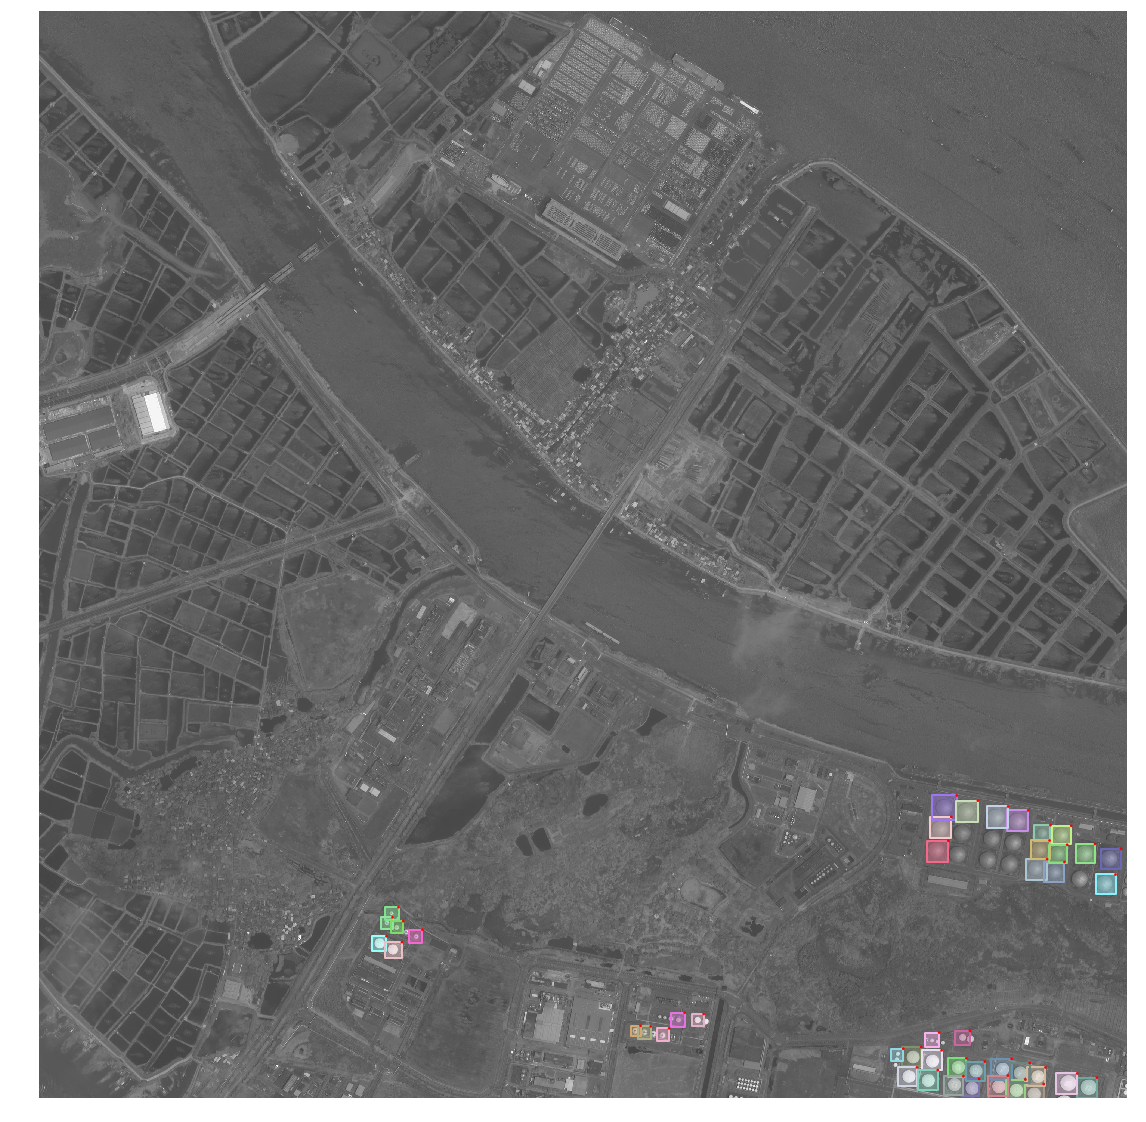

In [1]:
# import matplotlib.pyplot as plt
import os
import glob
import pylab
import shutil
from bbavectors import ROOT, WORK_DIR
from DOTA_devkit.DOTA import DOTA
from DOTA_devkit import dota_utils as util
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

util.Task2groundtruth_poly(
    os.path.join(WORK_DIR, 'merge'),
    os.path.join(WORK_DIR, 'restored/labelTxt')
)

imgs_path = os.path.join(WORK_DIR, 'restored/images')
if not os.path.exists(imgs_path):
    os.makedirs(imgs_path)

for file in glob.glob(os.path.join(ROOT, 'datasets/exemplosplit/images/*')):
    shutil.copy(file, imgs_path)

restored = DOTA(os.path.join(WORK_DIR, 'restored'))
imgids = restored.getImgIds()
anns = restored.loadAnns(imgId=imgids[0])

restored.showAnns(anns, imgids[0], 2)
